In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout,GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.models import Model

import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50

import numpy as np
from skimage import transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

C:\Users\SONAL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
splitfolders.ratio(
    "C://Users//SONAL//Desktop//KDD//CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="C://Users//SONAL//Desktop//KDD//dataset",
   seed=8,
   ratio=(0.75,0.12, 0.13)
)

Copying files: 12446 files [02:03, 101.00 files/s]


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )

Found 11694 images belonging to 4 classes.
Found 3020 images belonging to 4 classes.
Found 1492 images belonging to 4 classes.


In [5]:
from PIL import Image
import os

# Define the path to your dataset
data_path = r'C://Users//SONAL//Desktop//KDD//error//fdata'

# Create a new directory for the preprocessed images
preprocessed_path = r"C://Users//SONAL//Desktop//KDD//error//op"
os.makedirs(preprocessed_path, exist_ok=True)

# Loop through each image in the dataset directory
for filename in os.listdir(data_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Open the image
        with Image.open(os.path.join(data_path, filename)) as img:
            # Convert the image to grayscale
            img_gray = img.convert('L')
            # Rescale the image to 200x200
            img_rescaled = img_gray.resize((200, 200))
            # Save the preprocessed image
            img_rescaled.save(os.path.join(preprocessed_path, filename))


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.38)) #Regualrization


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.38))


model.add(Flatten())
model.add(Dense(512, activation='relu'))


model.add(Dropout(0.5))


model.add(Dense(4, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [7]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=METRICS)

In [8]:
Info = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=5,
)


Epoch 1/5
117/117 [==============================] - 1035s 9s/step - loss: 0.9577 - accuracy: 0.6324 - precision: 0.7451 - recall: 0.4938 - val_loss: 0.7217 - val_accuracy: 0.7473 - val_precision: 0.7882 - val_recall: 0.6883
Epoch 2/5
117/117 [==============================] - 744s 6s/step - loss: 0.6088 - accuracy: 0.7695 - precision: 0.8141 - recall: 0.7141 - val_loss: 0.2888 - val_accuracy: 0.9088 - val_precision: 0.9185 - val_recall: 0.8914
Epoch 3/5
117/117 [==============================] - 478s 4s/step - loss: 0.2710 - accuracy: 0.9018 - precision: 0.9116 - recall: 0.8885 - val_loss: 0.1037 - val_accuracy: 0.9718 - val_precision: 0.9718 - val_recall: 0.9698
Epoch 4/5
117/117 [==============================] - 2081s 18s/step - loss: 0.1182 - accuracy: 0.9603 - precision: 0.9621 - recall: 0.9582 - val_loss: 0.0559 - val_accuracy: 0.9866 - val_precision: 0.9866 - val_recall: 0.9866
Epoch 5/5
117/117 [==============================] - 489s 4s/step - loss: 0.0681 - accuracy: 0.9799 -

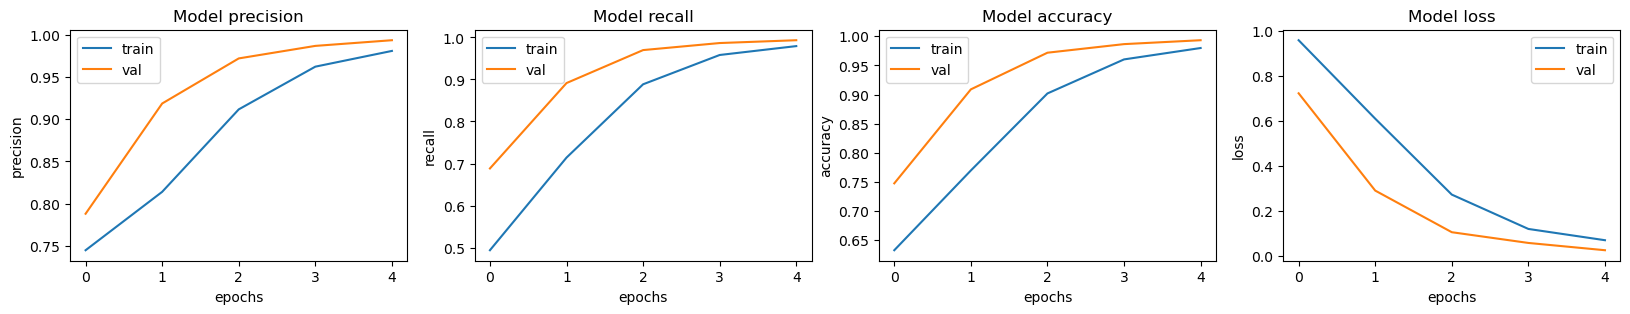

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [10]:
predictions = model.predict(test_dataset)

31/31 [==============================] - 109s 4s/step


In [11]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [12]:

def evaluate(actual, predictions):
    pre = []
    for i in predictions:
        pre.append(np.argmax(i))

    accuracy = (pre == actual).sum() / actual.shape[0]
    print(f'Accuracy: {accuracy * 100:.2f}%')

    precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')

    fig, ax = plt.subplots(figsize=(10,10))
    conf_mat = confusion_matrix(actual, pre)
    sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
    plt.show()
    
    if accuracy < 0.70:
        raise ValueError("Model accuracy is less than 70%!")

Accuracy: 99.77%
Precision: 0.9981845661982934
Recall: 0.9953452124430773
F1_score: 0.9967440185437365


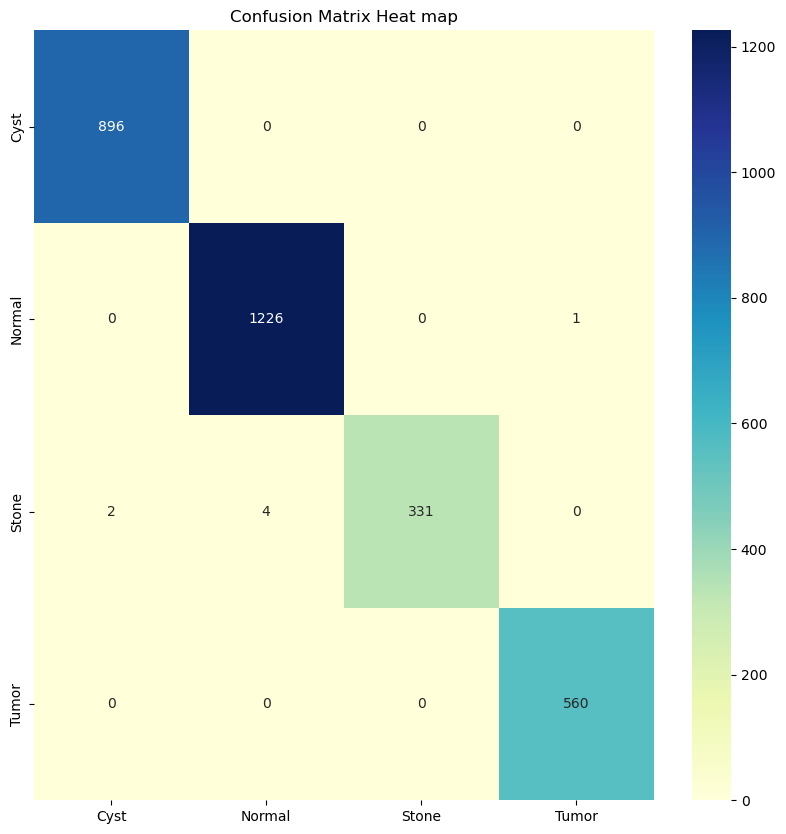

In [13]:
evaluate(test_dataset.classes, predictions)

In [14]:
model.evaluate(test_dataset)

31/31 [==============================] - 72s 2s/step - loss: 0.0106 - accuracy: 0.9977 - precision: 0.9977 - recall: 0.9977


[0.010567065328359604,
 0.9976820945739746,
 0.9976820945739746,
 0.9976820945739746]

In [15]:
model.save('model.hdf5')

C:\Users\SONAL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# LSTM

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=METRICS)


In [17]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=5,
                 )


Epoch 1/5
117/117 [==============================] - 508s 4s/step - loss: 0.0922 - accuracy: 0.9739 - precision: 0.9798 - recall: 0.9778 - val_loss: 0.0184 - val_accuracy: 0.9933 - val_precision: 0.9933 - val_recall: 0.9933
Epoch 2/5
117/117 [==============================] - 536s 5s/step - loss: 0.0249 - accuracy: 0.9920 - precision: 0.9920 - recall: 0.9918 - val_loss: 0.0297 - val_accuracy: 0.9899 - val_precision: 0.9899 - val_recall: 0.9899
Epoch 3/5
117/117 [==============================] - 492s 4s/step - loss: 0.0376 - accuracy: 0.9870 - precision: 0.9874 - recall: 0.9867 - val_loss: 0.0159 - val_accuracy: 0.9946 - val_precision: 0.9946 - val_recall: 0.9946
Epoch 4/5
117/117 [==============================] - 484s 4s/step - loss: 0.0185 - accuracy: 0.9938 - precision: 0.9939 - recall: 0.9936 - val_loss: 0.0032 - val_accuracy: 0.9993 - val_precision: 0.9993 - val_recall: 0.9993
Epoch 5/5
117/117 [==============================] - 483s 4s/step - loss: 0.0242 - accuracy: 0.9917 - pr

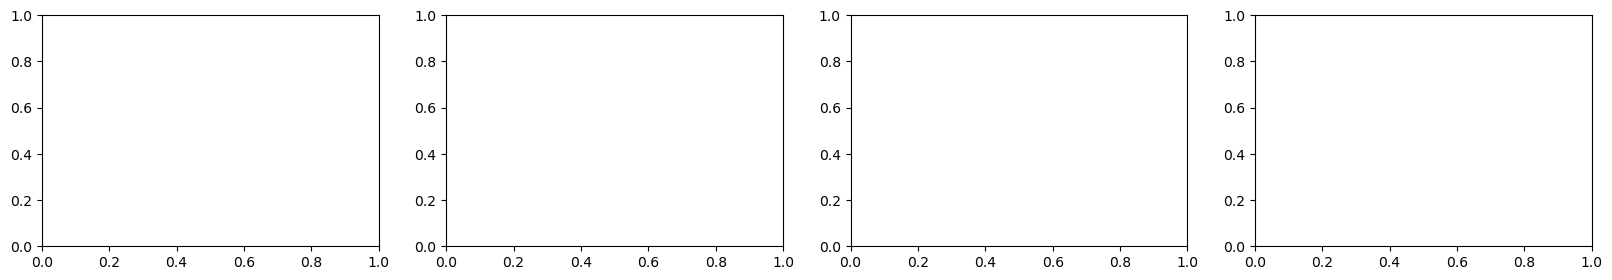

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

In [19]:
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [20]:

predictions = model.predict(test_dataset)

31/31 [==============================] - 72s 2s/step


In [21]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

Accuracy: 100.00%
Precision: 1.0
Recall: 1.0
F1_score: 1.0


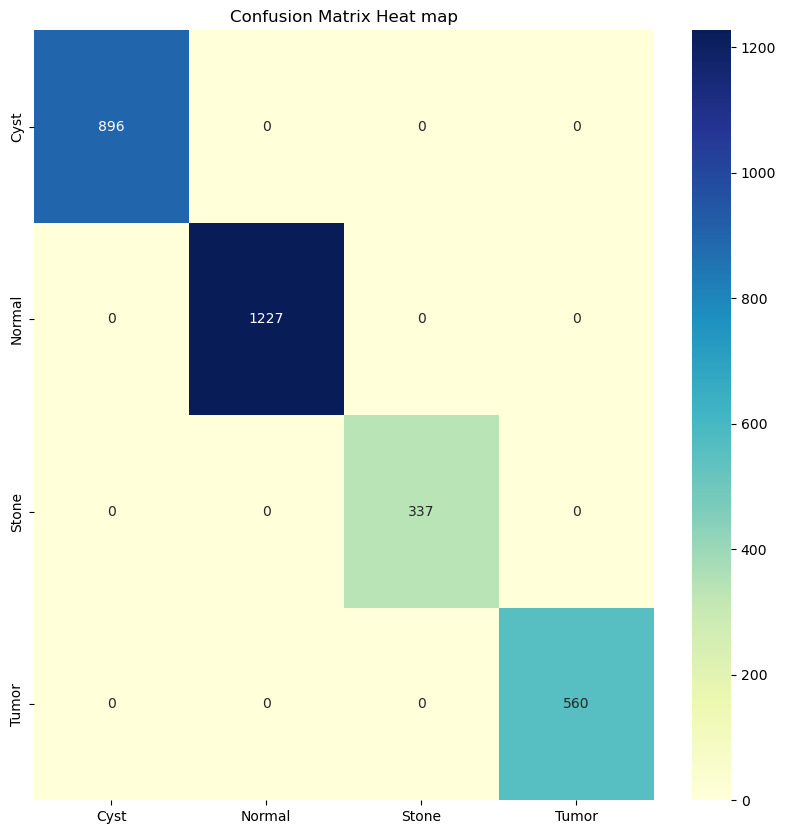

In [22]:

evaluate(test_dataset.classes, predictions)

In [23]:

model.save('modellstm.hdf5')

C:\Users\SONAL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# resnet

In [24]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(200,200,1))

In [25]:
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [26]:
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
for layer in base_model.layers:
    layer.trainable = False

In [28]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=METRICS)

In [29]:

Info = model.fit(
    train_dataset,
    epochs=5,
    validation_data=valid_dataset)

Epoch 1/5
117/117 [==============================] - 1310s 11s/step - loss: 0.9531 - accuracy: 0.6363 - precision: 0.8319 - recall: 0.5345 - val_loss: 0.6158 - val_accuracy: 0.7855 - val_precision: 0.8913 - val_recall: 0.6924
Epoch 2/5
117/117 [==============================] - 2149s 18s/step - loss: 0.4646 - accuracy: 0.8542 - precision: 0.9218 - recall: 0.7662 - val_loss: 0.3303 - val_accuracy: 0.9088 - val_precision: 0.9466 - val_recall: 0.8673
Epoch 3/5
117/117 [==============================] - 2453s 21s/step - loss: 0.2562 - accuracy: 0.9349 - precision: 0.9586 - recall: 0.9106 - val_loss: 0.1969 - val_accuracy: 0.9625 - val_precision: 0.9682 - val_recall: 0.9390
Epoch 4/5
117/117 [==============================] - 1979s 17s/step - loss: 0.1563 - accuracy: 0.9670 - precision: 0.9748 - recall: 0.9522 - val_loss: 0.1244 - val_accuracy: 0.9752 - val_precision: 0.9776 - val_recall: 0.9645
Epoch 5/5
117/117 [==============================] - 1364s 12s/step - loss: 0.1111 - accuracy: 0

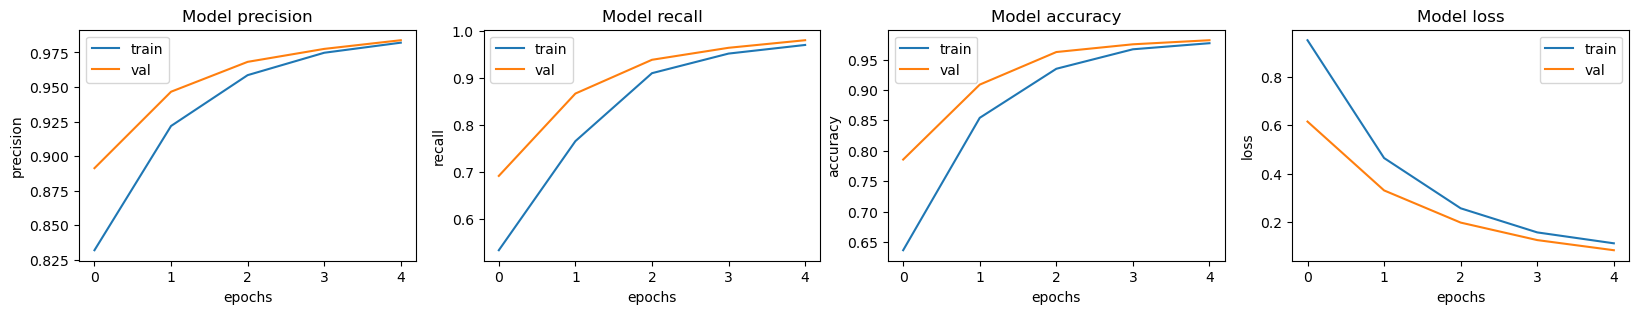

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [31]:

predictions = model.predict(test_dataset)

31/31 [==============================] - 165s 5s/step


In [32]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

Accuracy: 98.91%
Precision: 0.9877713051226211
Recall: 0.9806067771950908
F1_score: 0.9840746583351787


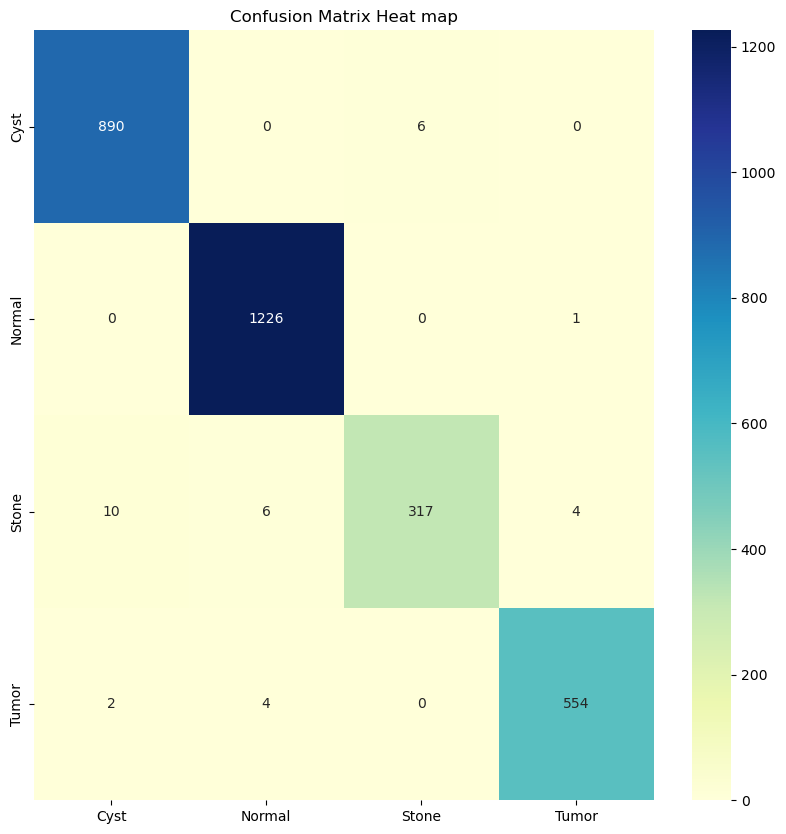

In [33]:
evaluate(test_dataset.classes, predictions)

In [34]:
model.save('modelresnet.hdf5')

C:\Users\SONAL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
